In [1]:
import pandas as pd 
import numpy as np

import tensorflow
import keras
from keras import layers, optimizers, regularizers
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.models import Sequential

from keras.utils import plot_model

import keras.backend as K

import seaborn as sns

from sklearn import preprocessing, model_selection 

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

## Data preparation

In [92]:
data = pd.read_csv("winequality-red.csv",sep=";")
data["quality"] =data["quality"].astype(object)
data.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [93]:
data["quality"] =data["quality"].astype(int)
data = pd.get_dummies(data, columns=["quality"])
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0,1,0,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0,1,0,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0,1,0,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,0,0,1,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0,1,0,0,0


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality_3             1599 non-null   uint8  
 12  quality_4             1599 non-null   uint8  
 13  quality_5             1599 non-null   uint8  
 14  quality_6             1599 non-null   uint8  
 15  quality_7            

## Split the datasets

In [63]:
X = data.iloc[:,0:11].values # first columns
Y = data.iloc[:,12:].values # last columns

X = preprocessing.normalize(X, axis = 0)

X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.3)

print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(1119, 11) (1119, 5) (480, 11) (480, 5)


## Build neutral networks model
choose different cell could build model with different layers.

In [77]:
# the four layer model
winemod1 = Sequential()
# layer 1
winemod1.add(Dense(30, input_dim=11, activation='relu', name='fc0',kernel_regularizer=regularizers.l2(0.01)))
winemod1.add(BatchNormalization(momentum=0.99, epsilon=0.001))
#layer 2
winemod1.add(Dense(50, name='fc1',bias_initializer='zeros'))
winemod1.add(BatchNormalization(momentum=0.99, epsilon=0.001))
winemod1.add(Activation('tanh'))
winemod1.add(Dropout(0.5))
#layer 3
winemod1.add(Dense(100, name='fc2',bias_initializer='zeros'))
winemod1.add(BatchNormalization(momentum=0.99, epsilon=0.001))
winemod1.add(Activation('relu'))
winemod1.add(Dropout(0.5))
#layer 4
winemod1.add(Dense(5, name='fc3',bias_initializer='zeros'))
winemod1.add(BatchNormalization(momentum=0.99, epsilon=0.001))
winemod1.add(Activation('softmax'))

In [87]:
# the five layer model
winemod1 = Sequential()
# layer 1
winemod1.add(Dense(30, input_dim=11, activation='relu', name='fc0',kernel_regularizer=regularizers.l2(0.01)))
winemod1.add(BatchNormalization(momentum=0.99, epsilon=0.001))
#layer 2
winemod1.add(Dense(50, name='fc1',bias_initializer='zeros'))
winemod1.add(BatchNormalization(momentum=0.99, epsilon=0.001))
winemod1.add(Activation('tanh'))
winemod1.add(Dropout(0.5))
#layer 3
winemod1.add(Dense(100, name='fc2',bias_initializer='zeros'))
winemod1.add(BatchNormalization(momentum=0.99, epsilon=0.001))
winemod1.add(Activation('relu'))
winemod1.add(Dropout(0.5))
#layer 4
winemod1.add(Dense(100, name='fc3',bias_initializer='zeros'))
winemod1.add(BatchNormalization(momentum=0.99, epsilon=0.001))
winemod1.add(Activation('relu'))
winemod1.add(Dropout(0.5))
#layer 5
winemod1.add(Dense(5, name='fc4',bias_initializer='zeros'))
winemod1.add(BatchNormalization(momentum=0.99, epsilon=0.001))
winemod1.add(Activation('softmax'))

In [88]:
winemod1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc0 (Dense)                  (None, 30)                360       
_________________________________________________________________
batch_normalization_33 (Batc (None, 30)                120       
_________________________________________________________________
fc1 (Dense)                  (None, 50)                1550      
_________________________________________________________________
batch_normalization_34 (Batc (None, 50)                200       
_________________________________________________________________
activation_25 (Activation)   (None, 50)                0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 50)                0         
_________________________________________________________________
fc2 (Dense)                  (None, 100)             

In [89]:
Adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
winemod1.compile(optimizer = Adam,loss = "categorical_crossentropy", metrics = ["categorical_accuracy"])

## Iteration

In [90]:
#save the result of each epoch in the history
history = winemod1.fit(x = X_train, y = Y_train, epochs = 40,verbose=1, batch_size = 64,validation_data=(X_test, Y_test))

Epoch 1/40
18/18 [==============================] - 3s 64ms/step - loss: 2.0167 - categorical_accuracy: 0.2306 - val_loss: 1.7177 - val_categorical_accuracy: 0.1625
Epoch 2/40
18/18 [==============================] - 0s 6ms/step - loss: 1.9249 - categorical_accuracy: 0.2529 - val_loss: 1.6856 - val_categorical_accuracy: 0.4042
Epoch 3/40
18/18 [==============================] - 0s 6ms/step - loss: 1.7630 - categorical_accuracy: 0.3029 - val_loss: 1.6573 - val_categorical_accuracy: 0.4042
Epoch 4/40
18/18 [==============================] - 0s 6ms/step - loss: 1.7062 - categorical_accuracy: 0.3298 - val_loss: 1.6302 - val_categorical_accuracy: 0.4042
Epoch 5/40
18/18 [==============================] - 0s 5ms/step - loss: 1.6525 - categorical_accuracy: 0.3476 - val_loss: 1.6023 - val_categorical_accuracy: 0.4042
Epoch 6/40
18/18 [==============================] - 0s 5ms/step - loss: 1.6163 - categorical_accuracy: 0.3968 - val_loss: 1.5774 - val_categorical_accuracy: 0.4042
Epoch 7/40
18/1

## Evaluate model

In [91]:
preds = winemod1.evaluate(x = X_test, y = Y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

15/15 [==============================] - 0s 2ms/step - loss: 1.0751 - categorical_accuracy: 0.5813

Loss = 1.0751380920410156
Test Accuracy = 0.581250011920929


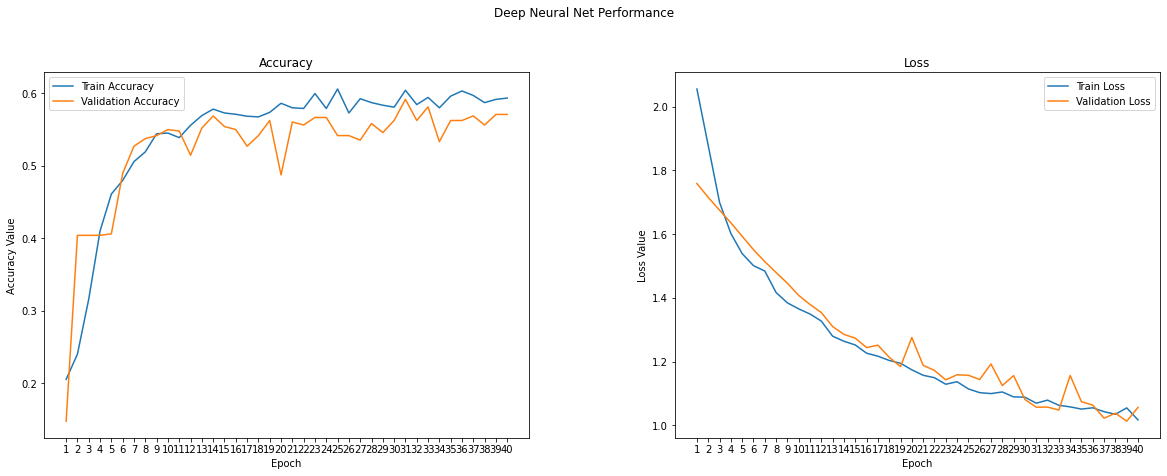

In [83]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
t = f.suptitle('Deep Neural Net Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epochs = list(range(1,41))
ax1.plot(epochs, history.history['categorical_accuracy'], label='Train Accuracy')
ax1.plot(epochs, history.history['val_categorical_accuracy'], label='Validation Accuracy')
ax1.set_xticks(epochs)
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epochs, history.history['loss'], label='Train Loss')
ax2.plot(epochs, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(epochs)
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")